In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,accuracy_score, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
import seaborn as sns

In [2]:
#Part 4: KNN Classification

In [3]:
#2 load Dataset
dataset="adult.csv"
data=pd.read_csv(dataset)
data.head()

age  workclass  fnlwgt     education  educational-num      marital-status  \
0   25    Private  226802          11th                7       Never-married   
1   38    Private   89814       HS-grad                9  Married-civ-spouse   
2   28  Local-gov  336951    Assoc-acdm               12  Married-civ-spouse   
3   44    Private  160323  Some-college               10  Married-civ-spouse   
4   18          ?  103497  Some-college               10       Never-married   

          occupation relationship   race  gender  capital-gain  capital-loss  \
0  Machine-op-inspct    Own-child  Black    Male             0             0   
1    Farming-fishing      Husband  White    Male             0             0   
2    Protective-serv      Husband  White    Male             0             0   
3  Machine-op-inspct      Husband  Black    Male          7688             0   
4                  ?    Own-child  White  Female             0             0   

   hours-per-week native-country income  
0              40  United-States  <=50K  
1              50  United-States  <=50K  
2              40  United-States   >50K  
3              40  United-States   >50K  
4              30  United-States  <=50K

In [4]:
#3 Dataset Information
print("DATASET DESCRIPTION")
print(data.describe()) 
print("--------------")
print("DATASET INFORMATION")
print(data.info())

DATASET DESCRIPTION
                age        fnlwgt  educational-num  capital-gain  \
count  48842.000000  4.884200e+04     48842.000000  48842.000000   
mean      38.643585  1.896641e+05        10.078089   1079.067626   
std       13.710510  1.056040e+05         2.570973   7452.019058   
min       17.000000  1.228500e+04         1.000000      0.000000   
25%       28.000000  1.175505e+05         9.000000      0.000000   
50%       37.000000  1.781445e+05        10.000000      0.000000   
75%       48.000000  2.376420e+05        12.000000      0.000000   
max       90.000000  1.490400e+06        16.000000  99999.000000   

       capital-loss  hours-per-week  
count  48842.000000    48842.000000  
mean      87.502314       40.422382  
std      403.004552       12.391444  
min        0.000000        1.000000  
25%        0.000000       40.000000  
50%        0.000000       40.000000  
75%        0.000000       45.000000  
max     4356.000000       99.000000  
--------------
DATASET IN

In [5]:
#Proprocessing of data
data.replace("?",np.nan,inplace=True)

features=data.drop(columns=["income"])
target=data["income"]

print(data.head())
categoricalcolumns=features.select_dtypes(include=["object"]).columns
print(categoricalcolumns)

categoricalimputer=SimpleImputer(strategy="most_frequent")
features[categoricalcolumns] = categoricalimputer.fit_transform(features[categoricalcolumns])
features.head()

   age  workclass  fnlwgt     education  educational-num      marital-status  \
0   25    Private  226802          11th                7       Never-married   
1   38    Private   89814       HS-grad                9  Married-civ-spouse   
2   28  Local-gov  336951    Assoc-acdm               12  Married-civ-spouse   
3   44    Private  160323  Some-college               10  Married-civ-spouse   
4   18        NaN  103497  Some-college               10       Never-married   

          occupation relationship   race  gender  capital-gain  capital-loss  \
0  Machine-op-inspct    Own-child  Black    Male             0             0   
1    Farming-fishing      Husband  White    Male             0             0   
2    Protective-serv      Husband  White    Male             0             0   
3  Machine-op-inspct      Husband  Black    Male          7688             0   
4                NaN    Own-child  White  Female             0             0   

   hours-per-week native-country incom

age  workclass  fnlwgt     education  educational-num      marital-status  \
0   25    Private  226802          11th                7       Never-married   
1   38    Private   89814       HS-grad                9  Married-civ-spouse   
2   28  Local-gov  336951    Assoc-acdm               12  Married-civ-spouse   
3   44    Private  160323  Some-college               10  Married-civ-spouse   
4   18    Private  103497  Some-college               10       Never-married   

          occupation relationship   race  gender  capital-gain  capital-loss  \
0  Machine-op-inspct    Own-child  Black    Male             0             0   
1    Farming-fishing      Husband  White    Male             0             0   
2    Protective-serv      Husband  White    Male             0             0   
3  Machine-op-inspct      Husband  Black    Male          7688             0   
4     Prof-specialty    Own-child  White  Female             0             0   

   hours-per-week native-country  
0              40  United-States  
1              50  United-States  
2              40  United-States  
3              40  United-States  
4              30  United-States

In [6]:
#pd.set_option('future.no_silent_downcasting', True)
target=target.replace("<=50K",0)  
target=target.replace(">50K",1)
target.head()


C:\Users\eruma\AppData\Local\Temp\ipykernel_8684\2847619611.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  target=target.replace(">50K",1)


0    0
1    0
2    1
3    1
4    0
Name: income, dtype: int64

In [7]:
features=pd.get_dummies(features,columns=categoricalcolumns)
features.head()

age  fnlwgt  educational-num  capital-gain  capital-loss  hours-per-week  \
0   25  226802                7             0             0              40   
1   38   89814                9             0             0              50   
2   28  336951               12             0             0              40   
3   44  160323               10          7688             0              40   
4   18  103497               10             0             0              30   

   workclass_Federal-gov  workclass_Local-gov  workclass_Never-worked  \
0                  False                False                   False   
1                  False                False                   False   
2                  False                 True                   False   
3                  False                False                   False   
4                  False                False                   False   

   workclass_Private  ...  native-country_Portugal  \
0               True  ...                    False   
1               True  ...                    False   
2              False  ...                    False   
3               True  ...                    False   
4               True  ...                    False   

   native-country_Puerto-Rico  native-country_Scotland  native-country_South  \
0                       False                    False                 False   
1                       False                    False                 False   
2                       False                    False                 False   
3                       False                    False                 False   
4                       False                    False                 False   

   native-country_Taiwan  native-country_Thailand  \
0                  False                    False   
1                  False                    False   
2                  False                    False   
3                  False                    False   
4                  False                    False   

   native-country_Trinadad&Tobago  native-country_United-States  \
0                           False                          True   
1                           False                          True   
2                           False                          True   
3                           False                          True   
4                           False                          True   

   native-country_Vietnam  native-country_Yugoslavia  
0                   False                      False  
1                   False                      False  
2                   False                      False  
3                   False                      False  
4                   False                      False  

[5 rows x 105 columns]

In [8]:
# Normalize Dataset
min_max_scaler=MinMaxScaler()
normalize_features=pd.DataFrame(min_max_scaler.fit_transform(features), columns=features.columns)
normalize_features.head()

age    fnlwgt  educational-num  capital-gain  capital-loss  \
0  0.109589  0.145129         0.400000      0.000000           0.0   
1  0.287671  0.052451         0.533333      0.000000           0.0   
2  0.150685  0.219649         0.733333      0.000000           0.0   
3  0.369863  0.100153         0.600000      0.076881           0.0   
4  0.013699  0.061708         0.600000      0.000000           0.0   

   hours-per-week  workclass_Federal-gov  workclass_Local-gov  \
0        0.397959                    0.0                  0.0   
1        0.500000                    0.0                  0.0   
2        0.397959                    0.0                  1.0   
3        0.397959                    0.0                  0.0   
4        0.295918                    0.0                  0.0   

   workclass_Never-worked  workclass_Private  ...  native-country_Portugal  \
0                     0.0                1.0  ...                      0.0   
1                     0.0                1.0  ...                      0.0   
2                     0.0                0.0  ...                      0.0   
3                     0.0                1.0  ...                      0.0   
4                     0.0                1.0  ...                      0.0   

   native-country_Puerto-Rico  native-country_Scotland  native-country_South  \
0                         0.0                      0.0                   0.0   
1                         0.0                      0.0                   0.0   
2                         0.0                      0.0                   0.0   
3                         0.0                      0.0                   0.0   
4                         0.0                      0.0                   0.0   

   native-country_Taiwan  native-country_Thailand  \
0                    0.0                      0.0   
1                    0.0                      0.0   
2                    0.0                      0.0   
3                    0.0                      0.0   
4                    0.0                      0.0   

   native-country_Trinadad&Tobago  native-country_United-States  \
0                             0.0                           1.0   
1                             0.0                           1.0   
2                             0.0                           1.0   
3                             0.0                           1.0   
4                             0.0                           1.0   

   native-country_Vietnam  native-country_Yugoslavia  
0                     0.0                        0.0  
1                     0.0                        0.0  
2                     0.0                        0.0  
3                     0.0                        0.0  
4                     0.0                        0.0  

[5 rows x 105 columns]

In [9]:
#5 Correlation Coefficient Matrix
data=pd.concat([normalize_features,target],axis=1) 
corr_matrix = data.corr()
target_corr = corr_matrix["income"].drop("income")

print("Correlation Coefficient Matrix")
print(target_corr)

Correlation Coefficient Matrix
age                               0.230369
fnlwgt                           -0.006339
educational-num                   0.332613
capital-gain                      0.223013
capital-loss                      0.147554
                                    ...   
native-country_Thailand          -0.004219
native-country_Trinadad&Tobago   -0.009107
native-country_United-States      0.037978
native-country_Vietnam           -0.015542
native-country_Yugoslavia         0.005522
Name: income, Length: 105, dtype: float64


In [10]:
#8 Split Dataset
#Partition the data into 80(training)/20(testing)
features_train, features_test, target_train, target_test=train_test_split(features,target,test_size=0.2,random_state=42)
print(features_train.describe())
print(features_test.describe())

                age        fnlwgt  educational-num  capital-gain  \
count  39073.000000  3.907300e+04     39073.000000  39073.000000   
mean      38.622297  1.896383e+05        10.076728   1073.395337   
std       13.723791  1.054049e+05         2.571699   7430.705849   
min       17.000000  1.228500e+04         1.000000      0.000000   
25%       28.000000  1.176340e+05         9.000000      0.000000   
50%       37.000000  1.779740e+05        10.000000      0.000000   
75%       48.000000  2.377350e+05        12.000000      0.000000   
max       90.000000  1.484705e+06        16.000000  99999.000000   

       capital-loss  hours-per-week  
count  39073.000000    39073.000000  
mean      89.246897       40.428173  
std      406.179060       12.457886  
min        0.000000        1.000000  
25%        0.000000       40.000000  
50%        0.000000       40.000000  
75%        0.000000       45.000000  
max     4356.000000       99.000000  
               age        fnlwgt  educational

In [11]:
print(target_train.describe())
print(target_test.describe())

count    39073.000000
mean         0.240499
std          0.427392
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: income, dtype: float64
count    9769.000000
mean        0.234415
std         0.423654
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: income, dtype: float64


In [12]:
#Training the Model
k=15
knn=KNeighborsClassifier(n_neighbors=k)
knn.fit(features_train,target_train)

KNeighborsClassifier(n_neighbors=15)

In [13]:
#10 Prediction
target_prediction=knn.predict(features_test)
print(target_prediction)

[0 0 1 ... 0 0 0]


In [14]:
#9 Confusion Matrix
#Not Working with regression model
c_m=confusion_matrix(target_test,target_prediction)
accuracy=accuracy_score(target_test,target_prediction)
print ("Confusion Matrix: \n",c_m)
print ("Accuracy: ",accuracy)

Confusion Matrix: 
 [[7287  192]
 [1749  541]]
Accuracy:  0.8013102671716654


In [15]:
#11 Model Evaluation
c_r=classification_report(target_test,target_prediction)
print ("Classification Report:\n ",c_r)

Classification Report:
                precision    recall  f1-score   support

           0       0.81      0.97      0.88      7479
           1       0.74      0.24      0.36      2290

    accuracy                           0.80      9769
   macro avg       0.77      0.61      0.62      9769
weighted avg       0.79      0.80      0.76      9769



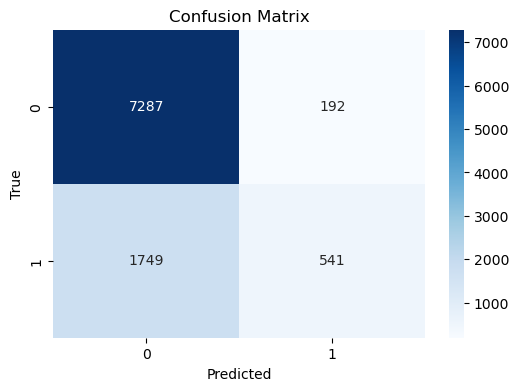

In [16]:
#12 Graphs
plt.figure(figsize=(6,4))
sns.heatmap(c_m,annot=True, cmap="Blues", fmt="d")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

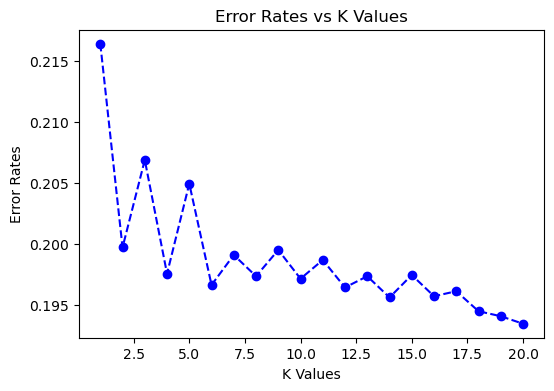

In [17]:
#Graph 2
e_r=[]
for i in range(5,25):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(features_train,target_train)
    target_p=knn.predict(features_test)
    e_r.append(np.mean(target_p != target_test))

plt.figure(figsize=(6,4))
plt.plot(range(1,21),e_r,marker="o",linestyle="dashed",color="blue")
plt.xlabel("K Values")
plt.ylabel("Error Rates")
plt.title("Error Rates vs K Values")
plt.show()

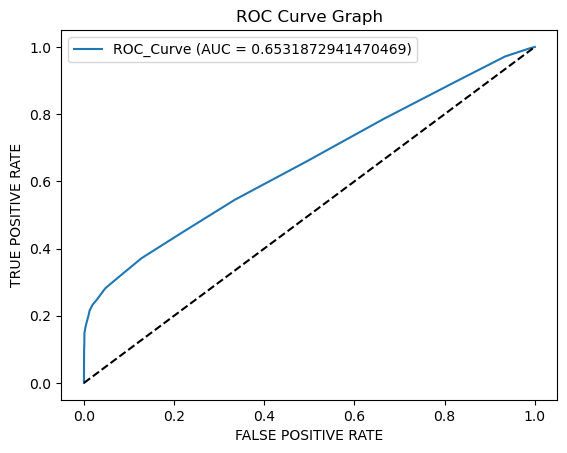

In [18]:
#12 ROC Curve Graphs
target_prediction_p= knn.predict_proba(features_test)[:,1]
fpr,tpr,thresholds=roc_curve(target_test,target_prediction_p)
roc_auc=auc(fpr,tpr)

#Plotting
plt.figure()
plt.plot(fpr,tpr,label="ROC_Curve (AUC = "+str(roc_auc)+")")
plt.plot([0,1],[0,1], linestyle="dashed",color="black")
plt.xlabel("FALSE POSITIVE RATE")
plt.ylabel("TRUE POSITIVE RATE")
plt.title("ROC Curve Graph")
plt.legend()
plt.show()

In [19]:
#Graph Correlation Heatmap
plt.figure(figsize=(100,100))
sns.heatmap(corr_matrix,annot=True,cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [20]:
#Graph Correlation Heatmap:Target
#plt.figure()
#sns.heatmap(target_corr,annot=True,cmap="coolwarm")
#plt.title("Correlation Heatmap")
#plt.show()

7762     0
23881    0
30507    0
28911    0
19484    0
        ..
43046    1
18798    1
29519    1
550      0
14337    1
Name: income, Length: 9769, dtype: int64


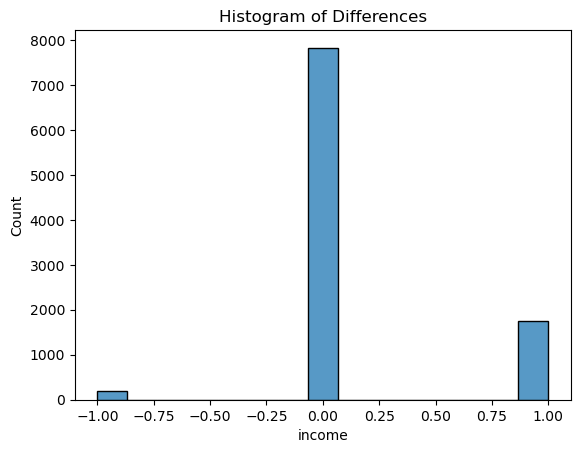

In [21]:
#Graph Histogram
diff=target_test-target_prediction
print(diff)

plt.figure()
sns.histplot(diff)
plt.title("Histogram of Differences")
plt.show()

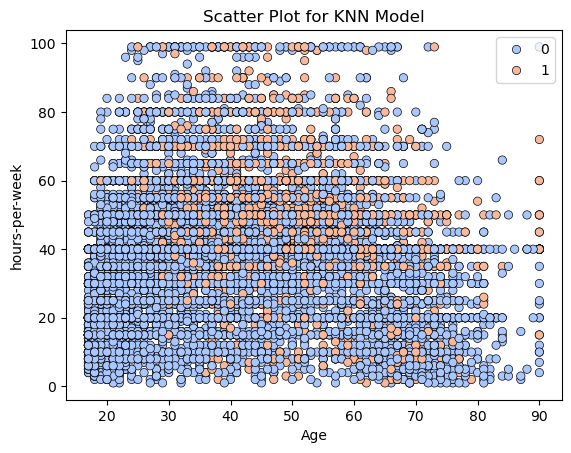

In [22]:
#Generating Scatter Plot
sns.scatterplot(x=features_train["age"],y=features_train["hours-per-week"],hue=target_train,edgecolor="k",palette="coolwarm")
plt.xlabel("Age")
plt.ylabel("hours-per-week")
plt.title("Scatter Plot for KNN Model")
plt.legend()
plt.show()